In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor 
import seaborn as sns
import xgboost as xgb


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scipy

In [ ]:
url = 'https://raw.githubusercontent.com/soghac/Simulation-based-system/main/data/throughput.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_scaled=scaler.fit_transform(x_train)

In [ ]:
x_test_scaled=scaler.transform(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [ ]:
AdaBoost_model=AdaBoostRegressor()

In [ ]:
AdaBoost_model.fit(x_train,y_train)

AdaBoostRegressor()

In [ ]:
AdaBoost_model.score(x_test,y_test)

0.9583257600080857

In [ ]:
AdaBoost_model.score(x_train,y_train)

0.9527833965370329

In [ ]:
y_pred = AdaBoost_model.predict(x_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.3661085021302281
Mean Squared Error: 0.7646861915761924
Root Mean Squared Error: 0.8744633734903895


In [ ]:
%%capture
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
permuter = PermutationImportance(
    estimator=AdaBoost_model,
    scoring='r2',
    n_iter=5,
    random_state=42)
permuter.fit(x_test,y_test)

PermutationImportance(estimator=AdaBoostRegressor(), random_state=42,
                      scoring='r2')

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
result = permutation_importance(
    AdaBoost_model, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T
)

In [ ]:
sorted_importances_idx

array([1, 5, 6, 7, 2, 4, 0, 3])

In [ ]:
importances

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,0.001679,0.002927,0.010222,1.845081
1,0.0,0.0,0.0,0.0,0.001663,0.002100,0.011615,1.895480
2,0.0,0.0,0.0,0.0,0.001827,0.006368,0.011213,1.873362
3,0.0,0.0,0.0,0.0,0.001637,0.001773,0.010078,1.870520
4,0.0,0.0,0.0,0.0,0.001884,0.002370,0.008996,1.908145
5,0.0,0.0,0.0,0.0,0.001674,0.004838,0.008695,1.848037
6,0.0,0.0,0.0,0.0,0.001826,0.005656,0.009864,1.973560
7,0.0,0.0,0.0,0.0,0.001738,0.004008,0.006008,1.863175
8,0.0,0.0,0.0,0.0,0.001718,0.004481,0.008137,1.838188
9,0.0,0.0,0.0,0.0,0.001673,0.001270,0.010779,1.836001


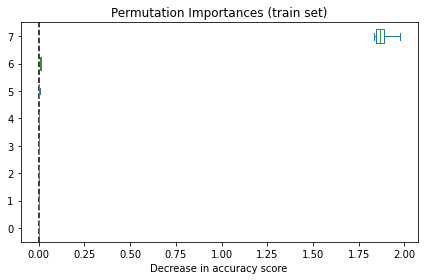

In [ ]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
AdaBoost_model.feature_importances_

array([4.94368435e-02, 0.00000000e+00, 8.80482139e-04, 9.45985793e-01,
       1.31325433e-03, 1.92906857e-03, 0.00000000e+00, 4.54558418e-04])

In [ ]:
df.columns

Index(['online user', '# Spark workers', '#VMs', 'size of data',
       'Amount of memory of workers', '# cores of workers', 'total memory',
       '#cores of VMs', 'throughput'],
      dtype='object')

In [ ]:
from scipy.stats import spearmanr

In [ ]:
#Adaboost
coef, p = spearmanr(y_test, y_pred)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.954
Samples are correlated (reject H0) p=0.000


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = AdaBoost_model, X = x_test_scaled, y = y_test, cv = 10)
accuracies.mean()
accuracies.std()

0.023525009297171707

In [ ]:
accuracies.mean()

0.9391625545569611

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.inspection import permutation_importance
imp = permutation_importance(regressor, x_train, y_train
                           )

imp


{'importances_mean': array([1.30226138e-02, 6.32138473e-04, 3.46345236e-05, 1.91310962e+00,
        3.71890535e-04, 5.76367951e-04, 3.23045036e-04, 2.53998944e-04]),
 'importances_std': array([2.04103073e-03, 2.61495711e-04, 1.97553302e-06, 6.06651934e-02,
        2.61301861e-04, 5.95569584e-04, 1.41515080e-05, 1.10134676e-05]),
 'importances': array([[ 1.62269512e-02,  1.32566673e-02,  1.08415917e-02,
          1.08192663e-02,  1.39685923e-02],
        [ 2.72052745e-04,  4.88055550e-04,  1.06174756e-03,
          7.14887382e-04,  6.23949128e-04],
        [ 3.78501844e-05,  3.41936913e-05,  3.47090955e-05,
          3.47772649e-05,  3.16423822e-05],
        [ 1.94069572e+00,  1.85754885e+00,  1.93915833e+00,
          1.83078711e+00,  1.99735810e+00],
        [ 2.01929565e-04,  1.34084503e-04,  7.04035373e-04,
          6.76886313e-04,  1.42516920e-04],
        [ 4.21519133e-04,  5.57119324e-05,  1.29155517e-03,
          1.25157162e-03, -1.38518092e-04],
        [ 3.37213855e-04,  3.1

In [ ]:
%%capture
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
permuter = PermutationImportance(
    estimator=regressor,
    scoring='r2',
    n_iter=5,
    random_state=42)
permuter.fit(x_test,y_test)

PermutationImportance(estimator=RandomForestRegressor(n_estimators=20,
                                                      random_state=0),
                      random_state=42, scoring='r2')

In [ ]:
result = permutation_importance(
    regressor, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T
)

In [ ]:
importances

,0,1,2,3,4,5,6,7
0,0.000032,0.000240,0.000306,0.000759,0.001028,0.001468,0.014364,1.837821
1,0.000033,0.000239,0.000304,0.000557,0.000966,0.000932,0.016128,1.891557
2,0.000034,0.000260,0.000332,0.000883,0.001056,0.002083,0.013958,1.874495
3,0.000031,0.000233,0.000297,0.000145,0.000225,0.000204,0.013504,1.860679
4,0.000037,0.000270,0.000344,0.000278,0.000418,0.000850,0.012470,1.902425
5,0.000032,0.000239,0.000304,0.001386,0.001632,0.002187,0.013076,1.849130
6,0.000035,0.000260,0.000332,0.000907,0.001066,0.001686,0.012612,1.972094
7,0.000034,0.000250,0.000318,0.000814,0.001015,0.001317,0.010791,1.856571
8,0.000033,0.000245,0.000313,0.000842,0.000935,0.001916,0.013480,1.828180
9,0.000033,0.000239,0.000304,-0.000368,-0.000025,-0.000286,0.016637,1.820602


In [ ]:
sorted_importances_idx

array([2, 7, 6, 4, 1, 5, 0, 3])

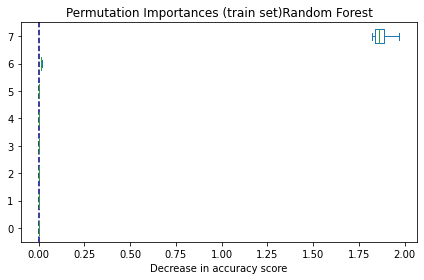

In [ ]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)Random Forest")
ax.axvline(x=0, color="navy", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.3060184010830117
Mean Squared Error: 0.7242419832030604
Root Mean Squared Error: 0.8510240790970961


In [ ]:
regressor.feature_importances_

array([1.43355516e-01, 4.63109285e-02, 5.81892300e-04, 6.79732024e-01,
       6.89721250e-02, 6.02326267e-02, 5.00006723e-04, 3.14881184e-04])

In [ ]:
df.columns

Index(['Actual', 'Predicted'], dtype='object')

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = regressor, X = x_test_scaled, y = y_test, cv = 10)
accuracies.mean()
accuracies.std()

0.022237088373185415

In [ ]:
accuracies.mean()

0.9509182853771708

In [ ]:
from sklearn.metrics import mean_absolute_error 

In [ ]:
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)
regression_model.fit(x_train,y_train)
# model evaluation
rmse = mean_squared_error(y, y_predicted)
mse = mean_squared_error(y, y_predicted)
mae = mean_absolute_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
regression_model.score(x_test,y_test)
from sklearn import metrics

In [ ]:
permuter = PermutationImportance(
    estimator=regression_model,
    scoring='r2',
    n_iter=5,
    random_state=42)
permuter.fit(x_test,y_test)

PermutationImportance(estimator=LinearRegression(), random_state=42,
                      scoring='r2')

In [ ]:
result = permutation_importance(
    regression_model, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T
)

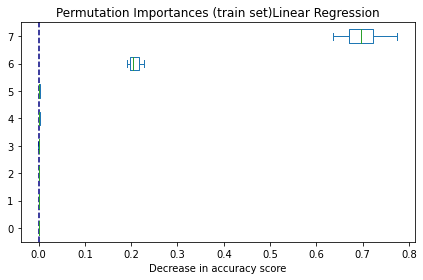

In [ ]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)Linear Regression")
ax.axvline(x=0, color="navy", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
importances

,0,1,2,3,4,5,6,7
0,2.971230e-07,1.019609e-06,0.000012,0.000260,0.001179,0.001033,0.202593,0.674779
1,2.581312e-07,7.512493e-06,0.000011,0.001685,0.001098,0.002671,0.222948,0.723280
2,-6.533941e-06,-2.775578e-06,-0.000098,0.001153,-0.000177,0.000076,0.190791,0.721770
3,4.601056e-06,7.042423e-06,0.000081,-0.000319,0.002009,0.002575,0.227262,0.635776
4,-1.987016e-06,-1.339686e-06,-0.000025,0.001263,0.000656,0.000439,0.195425,0.725457
5,3.217218e-06,4.366864e-06,0.000058,0.001105,0.001716,0.001846,0.205072,0.670132
6,-1.705611e-06,-2.968160e-07,-0.000021,-0.000334,0.000742,0.000677,0.192209,0.773647
7,8.767612e-07,2.948825e-06,0.000021,0.001028,0.001272,0.001503,0.204255,0.671091
8,6.493972e-06,7.744452e-06,0.000111,0.000802,0.002332,0.002721,0.221402,0.720192
9,4.474534e-06,2.662137e-06,0.000078,0.001393,0.001957,0.001429,0.203081,0.642852


In [ ]:
sorted_importances_idx

array([2, 1, 7, 5, 0, 6, 4, 3])

In [ ]:
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
print('Coefficients: \n', regression_model.coef_) 
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
regression_model.coef_
regression_model.intercept_

Slope: [ 2.49342200e+01 -1.00116514e+15 -5.74443526e+14  1.40687500e+02
  1.03380435e+15 -3.26392039e+13  5.07812469e+14  6.66310574e+13]
Intercept: 113.026313790101
Root mean squared error:  8497.097841478593
R2 score:  0.7267049600431809
Coefficients: 
 [ 2.49342200e+01 -1.00116514e+15 -5.74443526e+14  1.40687500e+02
  1.03380435e+15 -3.26392039e+13  5.07812469e+14  6.66310574e+13]
Mean Squared Error:  8497.097841478593
Mean Absolute Error:  56.49930168703813


113.026313790101

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.066091900841396
Mean Squared Error: 1507.7771615237166
Root Mean Squared Error: 38.83010638053567


In [ ]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [ ]:
get_score(LinearRegression(),x_train,x_test,y_train,y_test)

0.7391775311674722

In [ ]:
get_score(RandomForestRegressor() ,x_train,x_test,y_train,y_test)

0.9536632619279422

In [ ]:
regressor.score(x_train,y_train)

0.9543020778584539

In [ ]:
regressor.score(x_test,y_test)

0.9536083642038665

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth = 40)
tree.fit(x_train, y_train)
y_predic = tree.predict(x_test)

In [ ]:
permuter = PermutationImportance(
    estimator=tree,
    scoring='r2',
    n_iter=5,
    random_state=42)
permuter.fit(x_test,y_test)

PermutationImportance(estimator=DecisionTreeRegressor(max_depth=40),
                      random_state=42, scoring='r2')

In [ ]:
result = permutation_importance(
    tree, x_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T
)

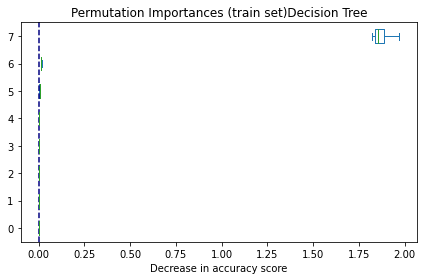

In [ ]:
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)Decision Tree")
ax.axvline(x=0, color="navy", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
importances

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.000004,0.000652,0.001500,0.005909,0.014401,1.836364
1,0.0,0.0,0.000006,0.000784,0.001480,0.004329,0.016305,1.890374
2,0.0,0.0,0.000005,0.000094,0.001633,0.007295,0.014142,1.875204
3,0.0,0.0,0.000005,0.000346,0.001458,0.003518,0.013566,1.859726
4,0.0,0.0,0.000004,0.000644,0.001680,0.003524,0.012426,1.901609
5,0.0,0.0,0.000005,0.000399,0.001492,0.009005,0.013357,1.848934
6,0.0,0.0,0.000004,0.000228,0.001627,0.005115,0.012731,1.971553
7,0.0,0.0,0.000006,0.000315,0.001552,0.005246,0.010888,1.855534
8,0.0,0.0,0.000004,0.000207,0.001529,0.006110,0.013584,1.827370
9,0.0,0.0,0.000007,0.001215,0.001482,0.003288,0.016945,1.819672


In [ ]:
#decision tree
coef, p = spearmanr(y_test, y_predic)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.973
Samples are correlated (reject H0) p=0.000


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = tree, X = x_test_scaled, y = y_test, cv = 10)
accuracies.mean()
accuracies.std()


0.021902658686843046

In [ ]:
accuracies.mean()

0.9510683810734177

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predic))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predic))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predic)))


Mean Absolute Error: 17.076901490223644
Mean Squared Error: 1510.6535708042366
Root Mean Squared Error: 38.867127123113136


In [ ]:
get_score(DecisionTreeRegressor() ,x_train,x_test,y_train,y_test)

0.9535198621790661

In [ ]:
tree.score(x_train,y_train)

0.9543437288709199

In [ ]:
coef, p = spearmanr(y_test, y_pred)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
 print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
 print('Samples are correlated (reject H0) p=%.3f' % p)

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

In [ ]:
t, p = paired_ttest_5x2cv(estimator1=tree,
                          estimator2=regressor,
                          X=x_train, y=y_train,
                          random_seed=1)

In [ ]:
print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: -0.800
p value: 0.460


In [ ]:
tree.feature_importances_

array([1.45802856e-01, 1.69138723e-02, 1.12985172e-03, 6.50294430e-01,
       2.11194106e-04, 1.85647795e-01, 0.00000000e+00, 0.00000000e+00])

In [ ]:
df.columns

Index(['online user', '# Spark workers', '#VMs', 'size of data',
       'Amount of memory of workers', '# cores of workers', 'total memory',
       '#cores of VMs', 'Ave response time'],
      dtype='object')